In [1]:
## 导入计算库
import numpy as np
import pandas as pd

## 导入绘图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入机器学习算法
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## 导入数据
import os
train = pd.read_csv("./data/happiness_train_complete.csv",header=0,encoding='latin-1')
test = pd.read_csv("./data/happiness_test_complete.csv",header=0,encoding='latin-1')
submit = pd.read_csv("./data/happiness_submit.csv",header=0,encoding='latin-1')

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## 数据处理后的大小
train.shape

(8000, 140)

In [4]:
## 初步了解数据
train.describe()

,id,happiness,survey_type,province,city,county,gender,nationality,religion,religion_freq,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.00000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000
mean,4000.50000,3.850125,1.405500,15.155375,42.564750,70.619000,1.53000,1.37350,0.772250,1.427250,...,3.722250,70.809500,68.170000,62.737625,66.320125,62.794187,67.064000,66.09625,65.626750,67.153750
std,2309.54541,0.938228,0.491019,8.917100,27.187404,38.747503,0.49913,1.52882,1.071459,1.408441,...,1.143358,21.184742,20.549943,24.771319,22.049437,23.463162,21.586817,23.08568,23.827493,22.502203
min,1.00000,-8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,-8.00000,-8.000000,-8.000000,...,-8.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000
25%,2000.75000,4.000000,1.000000,7.000000,18.000000,37.000000,1.00000,1.00000,1.000000,1.000000,...,3.000000,60.000000,60.000000,50.000000,60.000000,55.000000,60.000000,60.00000,60.000000,60.000000
50%,4000.50000,4.000000,1.000000,15.000000,42.000000,73.000000,2.00000,1.00000,1.000000,1.000000,...,4.000000,79.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000
75%,6000.25000,4.000000,2.000000,22.000000,65.000000,104.000000,2.00000,1.00000,1.000000,1.000000,...,5.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000
max,8000.00000,5.000000,2.000000,31.000000,89.000000,134.000000,2.00000,8.00000,1.000000,9.000000,...,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000


In [5]:
## 查看数据的前5行
train.head(5)

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50


In [6]:
# 得到数据的列号
#pd.set_option('display.width',None)
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_colwidth',None)

In [7]:
print('数据的内容：',train.columns.tolist())

数据的内容： ['id', 'happiness', 'survey_type', 'province', 'city', 'county', 'survey_time', 'gender', 'birth', 'nationality', 'religion', 'religion_freq', 'edu', 'edu_other', 'edu_status', 'edu_yr', 'income', 'political', 'join_party', 'floor_area', 'property_0', 'property_1', 'property_2', 'property_3', 'property_4', 'property_5', 'property_6', 'property_7', 'property_8', 'property_other', 'height_cm', 'weight_jin', 'health', 'health_problem', 'depression', 'hukou', 'hukou_loc', 'media_1', 'media_2', 'media_3', 'media_4', 'media_5', 'media_6', 'leisure_1', 'leisure_2', 'leisure_3', 'leisure_4', 'leisure_5', 'leisure_6', 'leisure_7', 'leisure_8', 'leisure_9', 'leisure_10', 'leisure_11', 'leisure_12', 'socialize', 'relax', 'learn', 'social_neighbor', 'social_friend', 'socia_outing', 'equity', 'class', 'class_10_before', 'class_10_after', 'class_14', 'work_exper', 'work_status', 'work_yr', 'work_type', 'work_manage', 'insur_1', 'insur_2', 'insur_3', 'insur_4', 'family_income', 'family_m', 'fa

In [8]:
train.iloc[:,:70].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8000 non-null   int64  
 1   happiness        8000 non-null   int64  
 2   survey_type      8000 non-null   int64  
 3   province         8000 non-null   int64  
 4   city             8000 non-null   int64  
 5   county           8000 non-null   int64  
 6   survey_time      8000 non-null   object 
 7   gender           8000 non-null   int64  
 8   birth            8000 non-null   object 
 9   nationality      8000 non-null   int64  
 10  religion         8000 non-null   int64  
 11  religion_freq    8000 non-null   int64  
 12  edu              8000 non-null   int64  
 13  edu_other        3 non-null      object 
 14  edu_status       6880 non-null   float64
 15  edu_yr           6028 non-null   float64
 16  income           8000 non-null   int64  
 17  political     

In [9]:
train.iloc[:,70:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   work_manage           2951 non-null   float64
 1   insur_1               8000 non-null   int64  
 2   insur_2               8000 non-null   int64  
 3   insur_3               8000 non-null   int64  
 4   insur_4               8000 non-null   int64  
 5   family_income         7999 non-null   float64
 6   family_m              8000 non-null   int64  
 7   family_status         8000 non-null   int64  
 8   house                 8000 non-null   int64  
 9   car                   8000 non-null   int64  
 10  invest_0              8000 non-null   int64  
 11  invest_1              8000 non-null   int64  
 12  invest_2              8000 non-null   int64  
 13  invest_3              8000 non-null   int64  
 14  invest_4              8000 non-null   int64  
 15  invest_5             

In [10]:
# 将train和test的数据合并在一起，然后一起处理
target = 'happiness'
train_target = pd.DataFrame(train[target],columns = [target])
train_label = train.drop(target, axis = 1,inplace = False)
data_train_test = pd.concat([train_label,test],axis = 0,ignore_index=True)

In [11]:
## 去掉ID
data_train_test.drop('id', axis = 1,inplace = True)
## 去掉空值太多的数据
labels = ['edu_other','join_party','property_other','work_status','work_yr','work_type','work_manage','invest_other','s_work_status','s_work_type']
data_train_test.drop(labels,axis = 1,inplace=True)

## 查看数据相关性

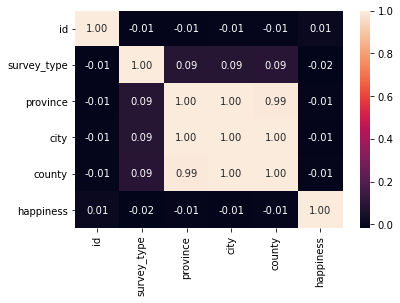

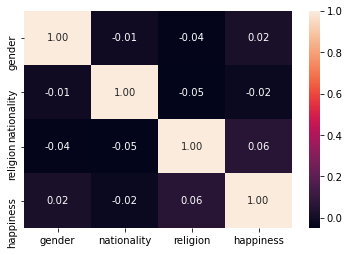

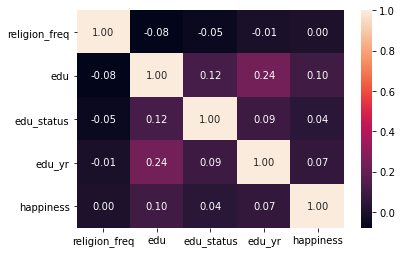

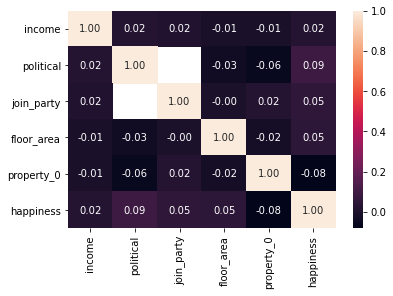

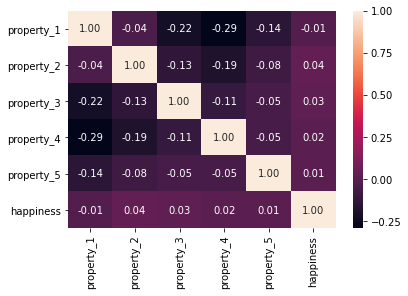

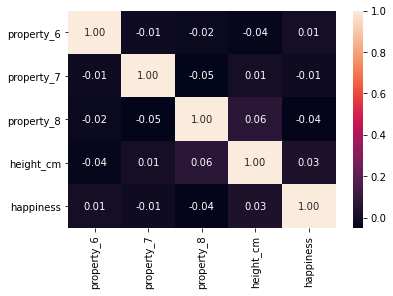

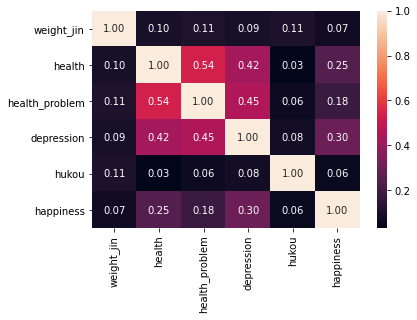

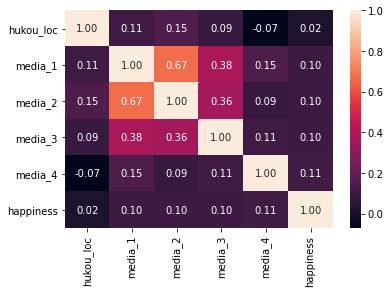

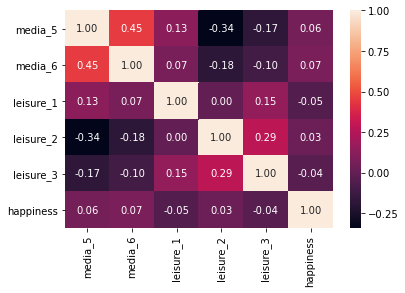

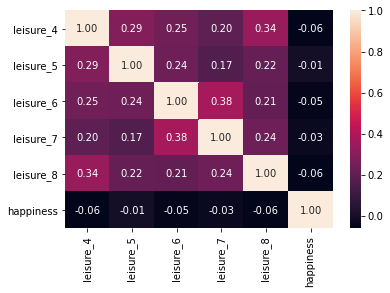

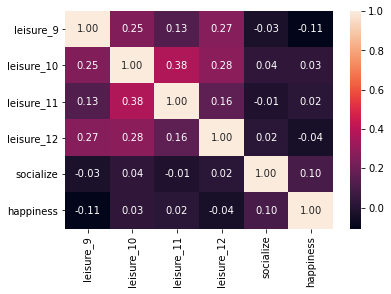

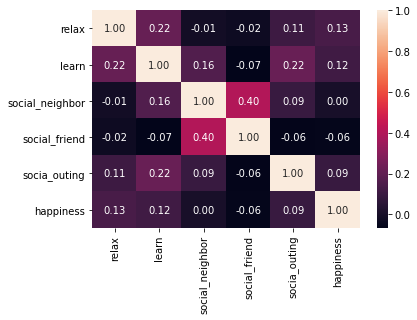

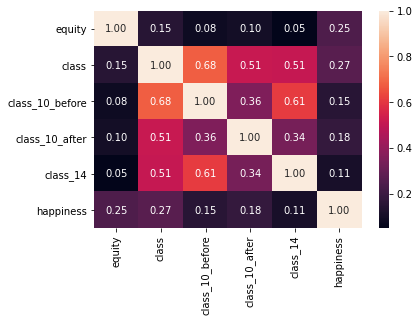

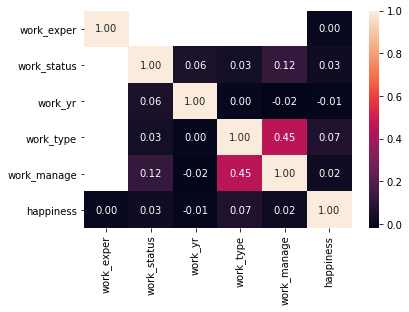

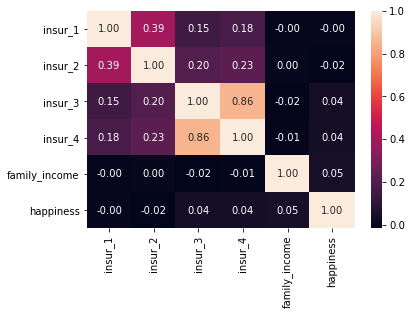

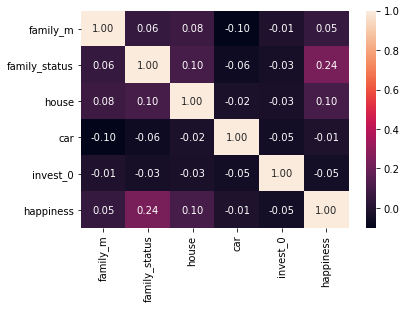

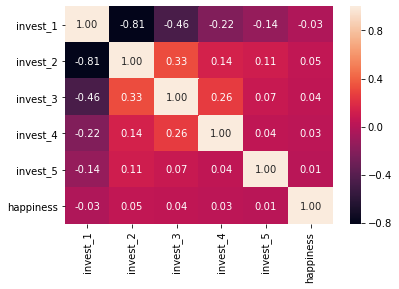

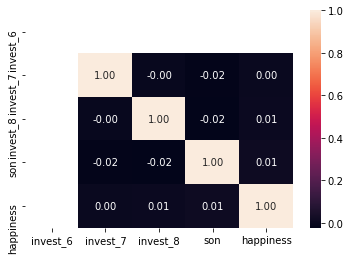

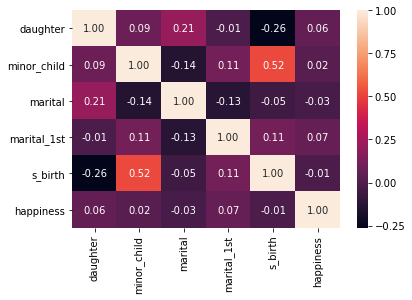

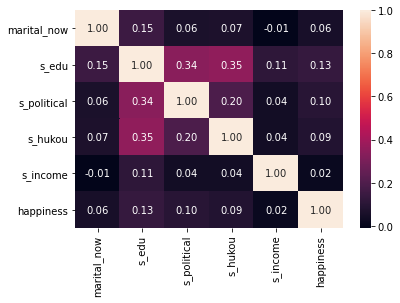

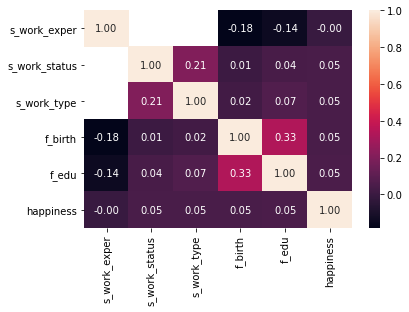

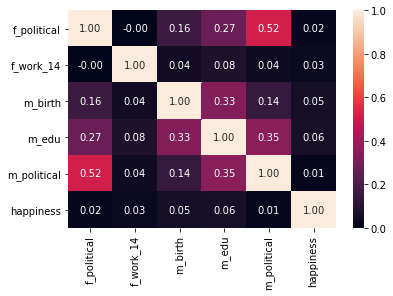

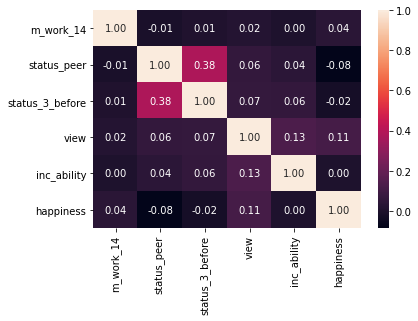

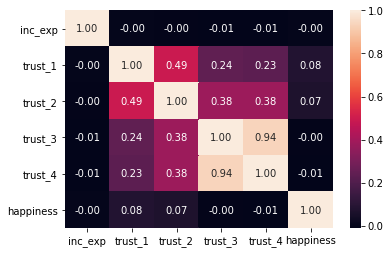

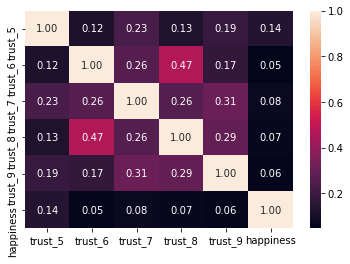

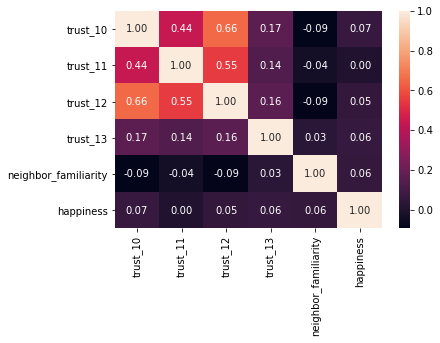

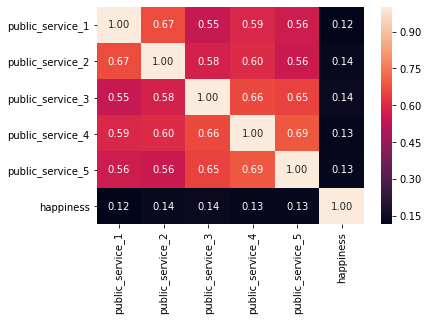

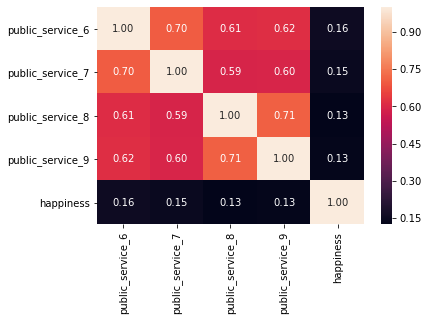

In [12]:
## 用热力图查看相关性
list1 = train.columns.tolist()
list1.remove('happiness')
step = 5
for i in range(len(list1)//step+1):
    start = step*i
    end = step*(i+1) if len(list1) > step*(i+1) else len(list1)
    sns.heatmap(train[list1[start:end]+['happiness']].corr(),annot = True, fmt = '0.2f')
    plt.show()

In [13]:
## 选出热力图中，相关性大于等于0.1的数据,其中income是人为加进去的
data_train_test = data_train_test.loc[:,['edu','income','health', 'health_problem', 'depression', 'media_1','media_2','media_3','media_4',
                                        'socialize', 'relax', 'learn', 'equity', 'class','class_10_before','class_10_after','class_14',
                                        'family_status', 'house', 's_edu', 's_political','view', 'trust_5',
                                        'public_service_1', 'public_service_2', 'public_service_3', 'public_service_4', 
                                        'public_service_5', 'public_service_6', 'public_service_7', 'public_service_8', 
                                         'public_service_9']
                                     ]

In [14]:
data_train_test.describe()

,edu,income,health,health_problem,depression,media_1,media_2,media_3,media_4,socialize,...,trust_5,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
count,10968.000000,1.096800e+04,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,...,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000,10968.000000
mean,4.857586,3.099567e+04,3.600201,3.795222,3.811725,1.891320,1.708880,1.797775,3.917943,2.799690,...,4.172958,70.904085,68.229075,62.885667,66.418490,63.172456,67.187546,66.092451,65.786743,67.379650
std,3.166881,2.002225e+05,1.113667,1.340943,1.087669,1.130835,0.963994,1.107246,1.065903,1.076999,...,1.226322,21.118684,20.546772,24.765324,22.061952,23.276158,21.524583,23.092778,23.720290,22.303287
min,-8.000000,-3.000000e+00,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,...,-8.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,3.000000,1.615000e+03,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,...,4.000000,60.000000,60.000000,50.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
50%,4.000000,1.500000e+04,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,4.000000,3.000000,...,4.000000,80.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
75%,6.000000,3.500000e+04,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,...,5.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
max,14.000000,9.999990e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [15]:
## 找到空数据所在的行
data_train_test.columns[data_train_test.isnull().any()]

Index(['s_edu', 's_political'], dtype='object')

In [16]:
# 查看空数据
data_train_test[data_train_test.isnull().T.any()]

,edu,income,health,health_problem,depression,media_1,media_2,media_3,media_4,socialize,...,trust_5,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
1,12,20000,5,4,3,2,2,1,3,2,...,5,90,70.0,70,80,85.0,70,90,60,60
3,3,6420,4,4,4,2,1,1,5,2,...,5,100,90.0,70,80,80.0,90,90,80,80
4,12,-1,5,5,3,1,3,4,2,4,...,5,50,50.0,50,50,50.0,50,50,50,50
8,3,1600,2,2,2,1,1,1,3,2,...,5,82,70.0,60,82,84.0,85,86,87,85
28,10,40000,4,4,3,1,2,3,3,4,...,4,60,40.0,40,40,50.0,40,60,80,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10938,6,0,5,5,5,4,2,4,2,1,...,4,60,60.0,60,60,60.0,60,60,60,60
10954,1,24000,5,5,4,2,1,1,5,2,...,4,-2,-2.0,-2,-2,-2.0,-2,-2,-2,-2
10956,4,25000,4,5,4,1,1,1,3,2,...,5,90,80.0,80,80,50.0,80,80,80,60
10961,6,50000,3,4,4,3,3,2,4,4,...,3,70,60.0,70,70,70.0,70,70,70,70


In [17]:
data_train_test.isnull().sum()

edu                    0
income                 0
health                 0
health_problem         0
depression             0
media_1                0
media_2                0
media_3                0
media_4                0
socialize              0
relax                  0
learn                  0
equity                 0
class                  0
class_10_before        0
class_10_after         0
class_14               0
family_status          0
house                  0
s_edu               2367
s_political         2367
view                   0
trust_5                0
public_service_1       0
public_service_2       0
public_service_3       0
public_service_4       0
public_service_5       0
public_service_6       0
public_service_7       0
public_service_8       0
public_service_9       0
dtype: int64

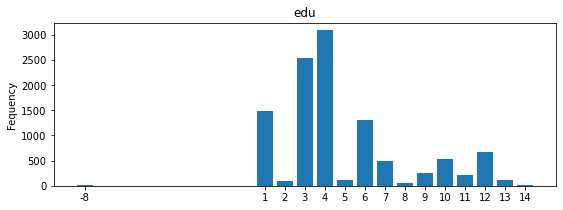

edu: 
  4     3084
 3     2546
 1     1479
 6     1300
 12     669
 10     535
 7      484
 9      250
 11     211
 5      122
 13     108
 2       87
 8       64
-8       19
 14      10
Name: edu, dtype: int64


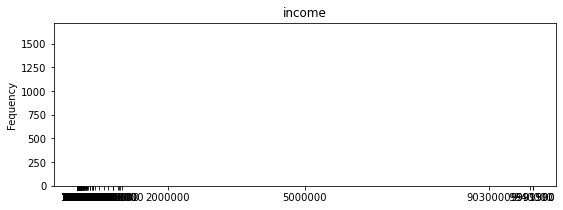

income: 
 0        1641
20000     824
30000     796
10000     758
50000     500
         ... 
22200       1
5800        1
5760        1
2620        1
8100        1
Name: income, Length: 387, dtype: int64


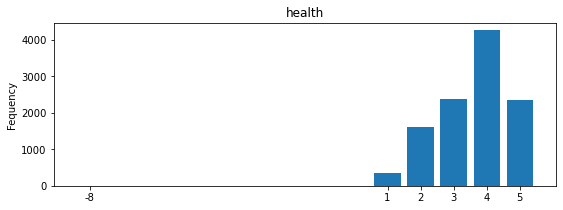

health: 
  4    4257
 3    2379
 5    2359
 2    1617
 1     349
-8       7
Name: health, dtype: int64


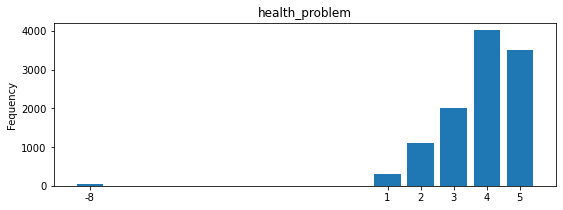

health_problem: 
  4    4010
 5    3502
 3    1997
 2    1094
 1     313
-8      52
Name: health_problem, dtype: int64


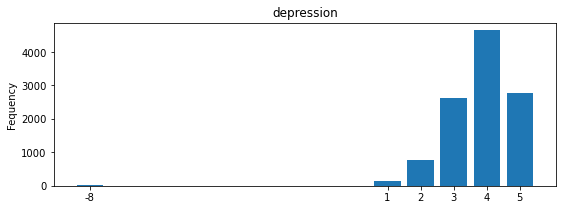

depression: 
  4    4644
 5    2783
 3    2623
 2     763
 1     129
-8      26
Name: depression, dtype: int64


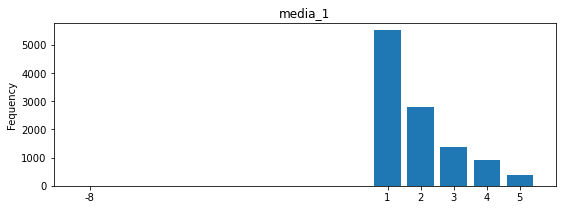

media_1: 
  1    5509
 2    2790
 3    1381
 4     902
 5     384
-8       2
Name: media_1, dtype: int64


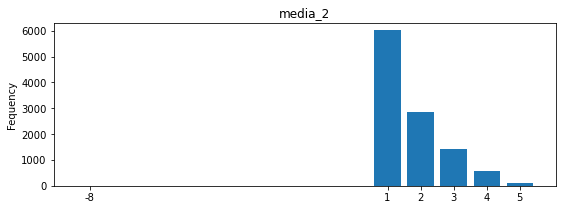

media_2: 
  1    6012
 2    2855
 3    1420
 4     579
 5      97
-8       5
Name: media_2, dtype: int64


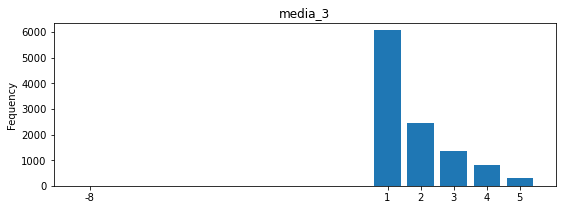

media_3: 
  1    6059
 2    2434
 3    1350
 4     819
 5     301
-8       5
Name: media_3, dtype: int64


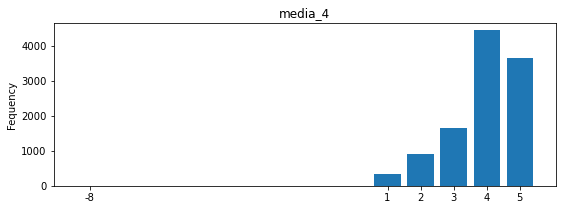

media_4: 
  4    4429
 5    3634
 3    1650
 2     917
 1     334
-8       4
Name: media_4, dtype: int64


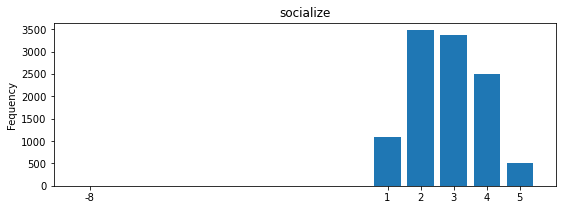

socialize: 
  2    3472
 3    3378
 4    2495
 1    1097
 5     520
-8       6
Name: socialize, dtype: int64


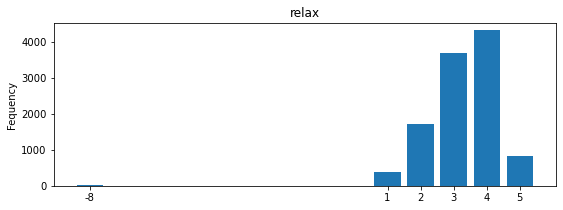

relax: 
  4    4318
 3    3690
 2    1730
 5     833
 1     375
-8      22
Name: relax, dtype: int64


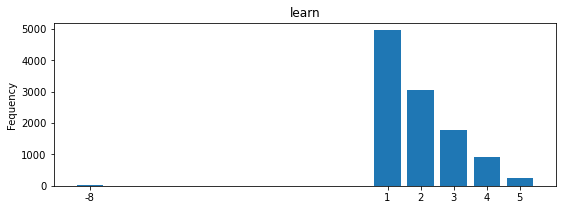

learn: 
  1    4947
 2    3039
 3    1764
 4     933
 5     257
-8      28
Name: learn, dtype: int64


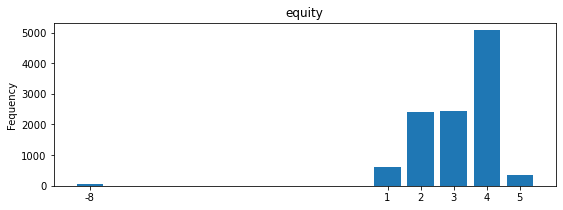

equity: 
  4    5067
 3    2433
 2    2419
 1     617
 5     368
-8      64
Name: equity, dtype: int64


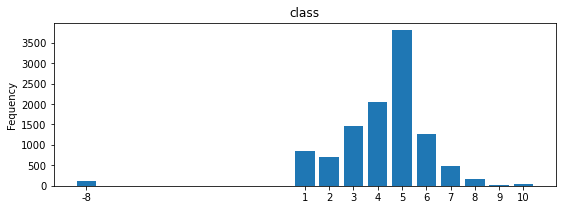

class: 
  5     3800
 4     2047
 3     1472
 6     1267
 1      845
 2      711
 7      482
 8      158
-8      106
 10      53
 9       27
Name: class, dtype: int64


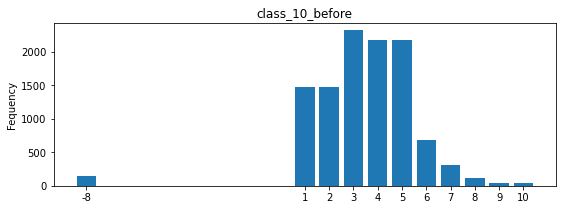

class_10_before: 
  3     2318
 5     2183
 4     2173
 2     1479
 1     1476
 6      685
 7      303
-8      148
 8      119
 10      47
 9       37
Name: class_10_before, dtype: int64


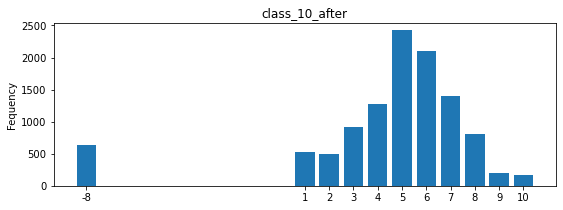

class_10_after: 
  5     2422
 6     2107
 7     1399
 4     1274
 3      923
 8      801
-8      638
 1      533
 2      501
 9      202
 10     168
Name: class_10_after, dtype: int64


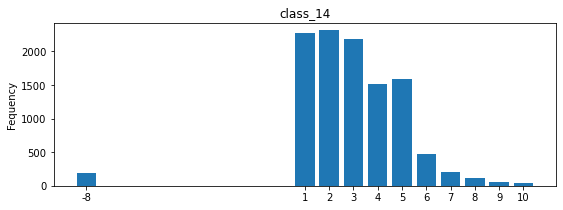

class_14: 
  2     2312
 1     2280
 3     2187
 5     1589
 4     1519
 6      466
 7      209
-8      191
 8      118
 9       60
 10      37
Name: class_14, dtype: int64


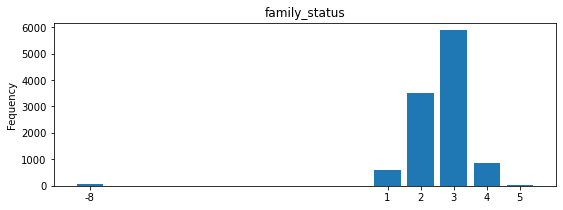

family_status: 
  3    5875
 2    3516
 4     879
 1     606
-8      64
 5      28
Name: family_status, dtype: int64


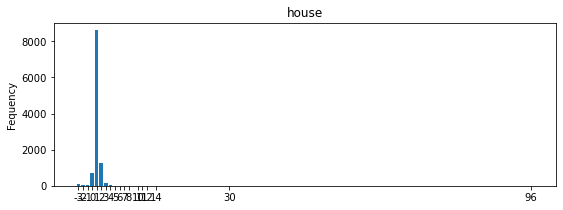

house: 
  1     8593
 2     1245
 0      707
 3      174
-3       90
-1       61
 4       46
-2       23
 5       16
 11       2
 6        2
 8        2
 7        2
 12       1
 10       1
 14       1
 30       1
 96       1
Name: house, dtype: int64


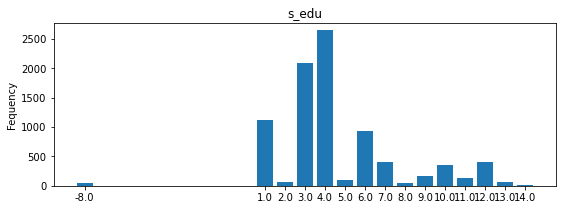

s_edu: 
  4.0     2639
 3.0     2093
 1.0     1121
 6.0      930
 12.0     406
 7.0      399
 10.0     353
 9.0      175
 11.0     134
 5.0      107
 13.0      72
 2.0       57
 8.0       55
-8.0       46
 14.0      14
Name: s_edu, dtype: int64


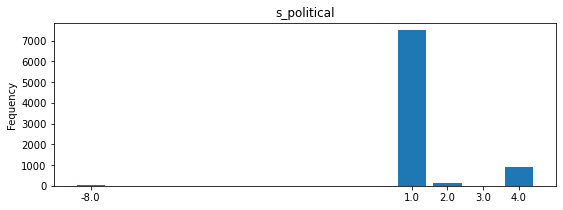

s_political: 
  1.0    7495
 4.0     914
 2.0     159
-8.0      24
 3.0       9
Name: s_political, dtype: int64


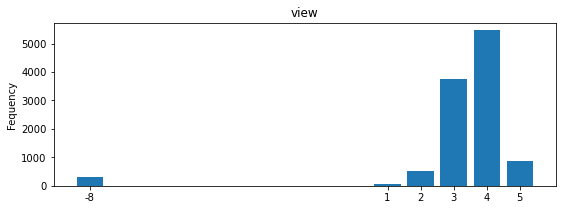

view: 
  4    5459
 3    3766
 5     856
 2     529
-8     305
 1      53
Name: view, dtype: int64


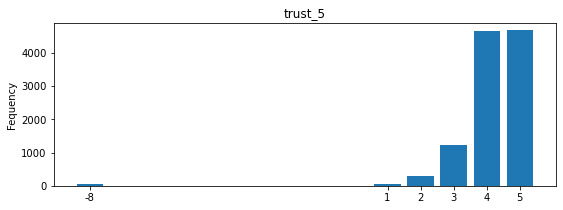

trust_5: 
  5    4665
 4    4654
 3    1225
 2     305
-8      64
 1      55
Name: trust_5, dtype: int64


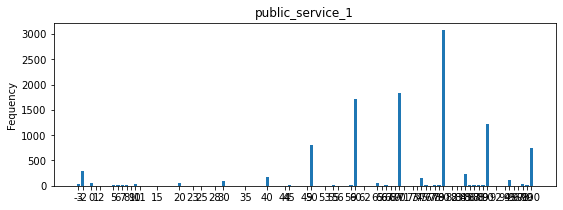

public_service_1: 
 80    3067
70    1830
60    1710
90    1230
50     801
      ... 
44       1
71       1
92       1
94       1
53       1
Name: public_service_1, Length: 62, dtype: int64


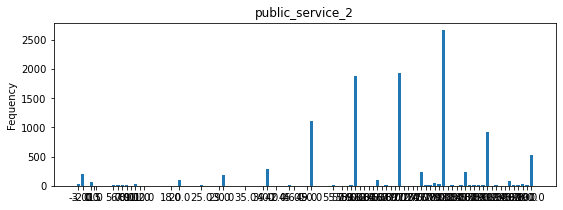

public_service_2: 
 80.0    2657
70.0    1924
60.0    1882
50.0    1109
90.0     918
        ... 
18.0       1
73.0       1
29.0       1
46.0       1
63.0       1
Name: public_service_2, Length: 71, dtype: int64


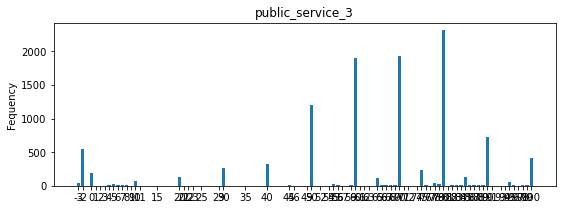

public_service_3: 
 80    2308
70    1932
60    1901
50    1206
90     724
      ... 
54       1
52       1
15       1
61       1
62       1
Name: public_service_3, Length: 72, dtype: int64


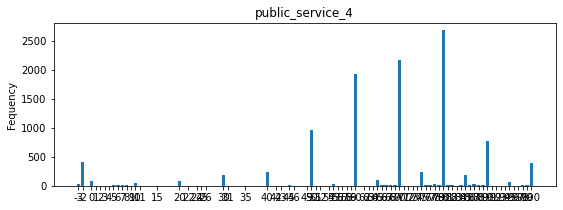

public_service_4: 
 80    2680
70    2173
60    1926
50     958
90     776
      ... 
51       1
91       1
15       1
22       1
3        1
Name: public_service_4, Length: 78, dtype: int64


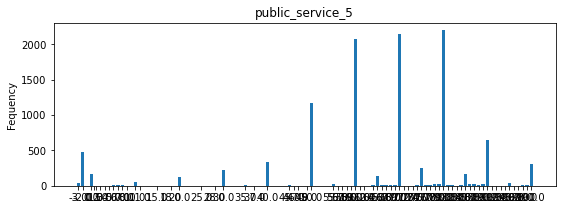

public_service_5: 
 80.0    2192
70.0    2145
60.0    2069
50.0    1174
90.0     652
        ... 
47.0       1
37.0       1
15.0       1
18.0       1
46.0       1
Name: public_service_5, Length: 73, dtype: int64


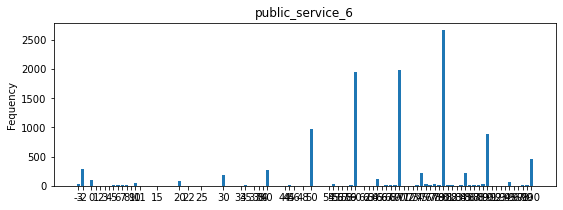

public_service_6: 
 80    2655
70    1979
60    1953
50     974
90     881
      ... 
38       1
39       1
34       1
63       1
46       1
Name: public_service_6, Length: 76, dtype: int64


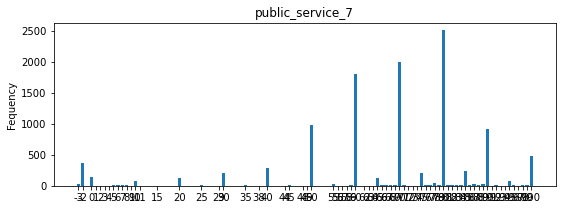

public_service_7: 
 80    2502
70    1989
60    1802
50     976
90     913
      ... 
63       1
2        1
29       1
38       1
94       1
Name: public_service_7, Length: 72, dtype: int64


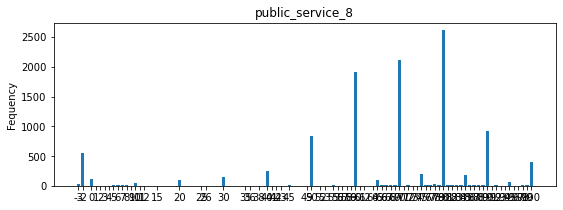

public_service_8: 
 80    2609
70    2113
60    1910
90     914
50     840
      ... 
52       1
3        1
43       1
36       1
2        1
Name: public_service_8, Length: 77, dtype: int64


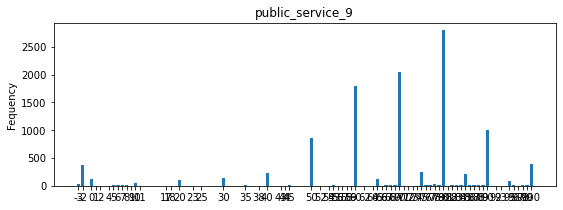

public_service_9: 
 80    2793
70    2051
60    1794
90    1007
50     852
      ... 
74       1
43       1
44       1
52       1
38       1
Name: public_service_9, Length: 70, dtype: int64


In [18]:
## 查看每个数据的分布状态
def bar_plot(variable):
    '''
        input: variable ex: "sex"
        output: bar plot & value count
    '''
    #get future
    var = data_train_test[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Fequency')
    plt.title(variable)
    plt.show()
    
    print("{}: \n {}".format(variable, varValue))

category = data_train_test.columns.tolist()
for cate in category:
    bar_plot(cate)

In [19]:
# 去掉happiness缺省的项
target_null_len = train_target[train_target['happiness']==-8].shape[0]
select = pd.concat([train_target['happiness']!=-8,pd.Series([True]*test.shape[0])]).tolist()
data_train_test = data_train_test[select]
train_target = train_target[train_target['happiness']!=-8]

In [20]:
# 非连续性数值，用-8填充了缺省数据
uncontinuous_value_a_list = ['edu','health', 'health_problem', 'depression', 'media_1','media_2','media_3','media_4',
                'socialize', 'relax', 'learn', 'equity', 'class','class_10_before','class_10_after','class_14',
                'family_status', 's_edu', 's_political','view', 'trust_5',
                'public_service_1', 'public_service_2', 'public_service_3', 'public_service_4', 
                'public_service_5', 'public_service_6', 'public_service_7', 'public_service_8', 'public_service_9']
data_train_test.fillna(-8,inplace = True) #用-8填充缺失值
# 非连续性数值，不存在缺省数据
uncontinuous_value_b_list = ['house']
# 连续性数值
continuous_value_list = ['income','public_service_1', 'public_service_2', 'public_service_3', 'public_service_4', 
                        'public_service_5', 'public_service_6', 'public_service_7', 'public_service_8', 'public_service_9']

In [21]:
## 去掉空数据
#data_train_test.dropna(axis=0, how='any', inplace=True)
## 查看是否还有空数据
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10956 entries, 0 to 10967
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edu               10956 non-null  int64  
 1   income            10956 non-null  int64  
 2   health            10956 non-null  int64  
 3   health_problem    10956 non-null  int64  
 4   depression        10956 non-null  int64  
 5   media_1           10956 non-null  int64  
 6   media_2           10956 non-null  int64  
 7   media_3           10956 non-null  int64  
 8   media_4           10956 non-null  int64  
 9   socialize         10956 non-null  int64  
 10  relax             10956 non-null  int64  
 11  learn             10956 non-null  int64  
 12  equity            10956 non-null  int64  
 13  class             10956 non-null  int64  
 14  class_10_before   10956 non-null  int64  
 15  class_10_after    10956 non-null  int64  
 16  class_14          10956 non-null  int64 

In [22]:
## 数据处理后的大小
data_train_test.shape

(10956, 32)

# 特征工程

In [23]:
# 处理# 非连续性数值，用-8填充了缺省数据
for label in uncontinuous_value_a_list:
    mean = np.round(data_train_test[label].mean())
    data_train_test[label] = data_train_test[label].apply(lambda x: mean if x == -8 else x)

In [24]:
# 处理houses数据（非连续性数值，不存在缺省数据）
data_train_test["house"]=data_train_test["house"].apply(lambda num: num if num < 5 else 5)

In [25]:
# 处理连续性数值
def income_level(socre):
    if socre < 20000:
        level = 1
    elif socre <100000:
        level  = 2
    elif socre < 300000:
        level = 3
    elif socre < 1000000:
        level = 4
    elif socre < 2000000:
        level = 5
    else:
        level  = 6
    return level
data_train_test['income'] = data_train_test['income'].apply(income_level)

def satify(socre):
    if socre < 60:
        level = 1
    elif socre <80:
        level  = 2
    elif socre < 90:
        level = 3
    else:
        level  = 4
    return level
continuous_value_list.remove('income')
for label in continuous_value_list:
    data_train_test[label] = data_train_test[label].apply(satify)

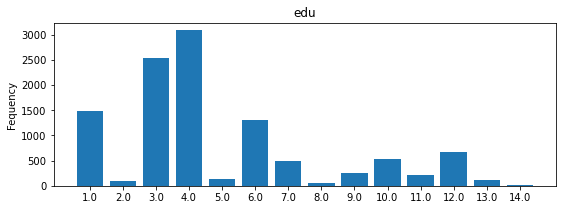

edu: 
 4.0     3082
3.0     2542
1.0     1479
6.0     1297
12.0     669
10.0     534
7.0      484
9.0      250
11.0     211
5.0      139
13.0     108
2.0       87
8.0       64
14.0      10
Name: edu, dtype: int64


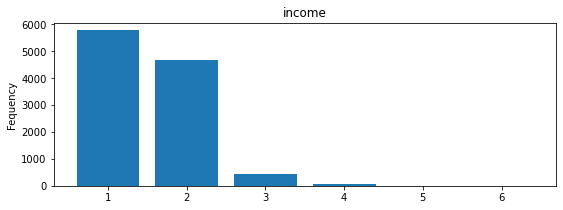

income: 
 1    5766
2    4674
3     442
4      58
5      10
6       6
Name: income, dtype: int64


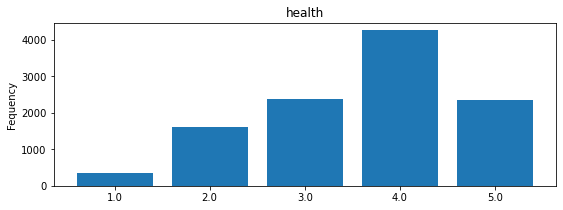

health: 
 4.0    4260
3.0    2375
5.0    2356
2.0    1616
1.0     349
Name: health, dtype: int64


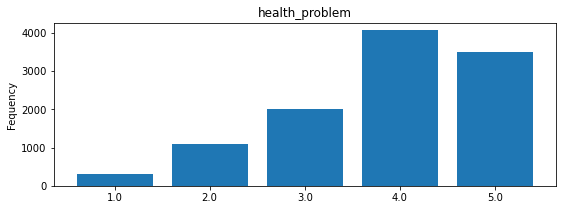

health_problem: 
 4.0    4057
5.0    3497
3.0    1995
2.0    1094
1.0     313
Name: health_problem, dtype: int64


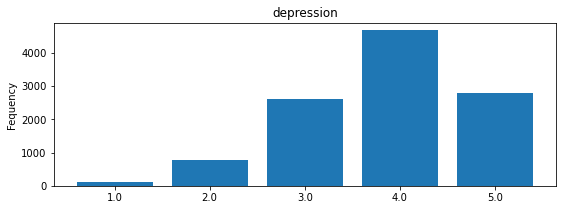

depression: 
 4.0    4667
5.0    2779
3.0    2620
2.0     762
1.0     128
Name: depression, dtype: int64


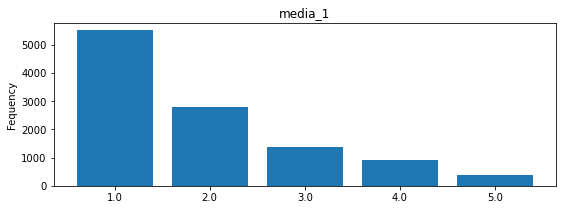

media_1: 
 1.0    5504
2.0    2788
3.0    1378
4.0     902
5.0     384
Name: media_1, dtype: int64


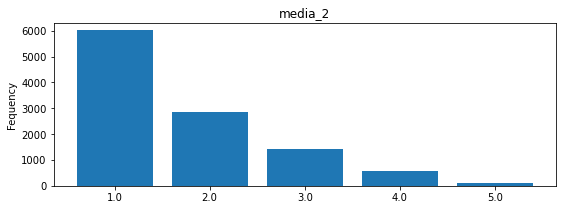

media_2: 
 1.0    6007
2.0    2854
3.0    1420
4.0     578
5.0      97
Name: media_2, dtype: int64


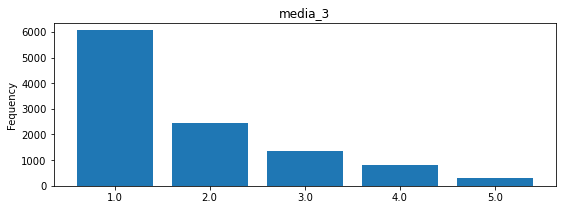

media_3: 
 1.0    6054
2.0    2436
3.0    1348
4.0     819
5.0     299
Name: media_3, dtype: int64


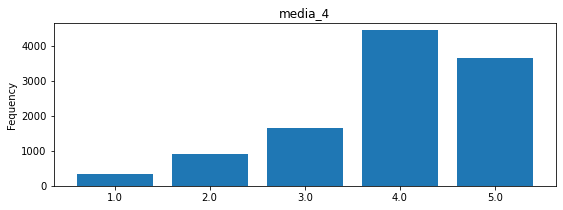

media_4: 
 4.0    4430
5.0    3631
3.0    1648
2.0     913
1.0     334
Name: media_4, dtype: int64


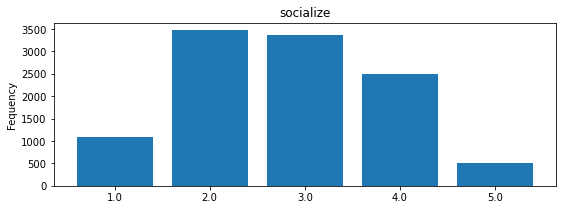

socialize: 
 2.0    3469
3.0    3378
4.0    2493
1.0    1096
5.0     520
Name: socialize, dtype: int64


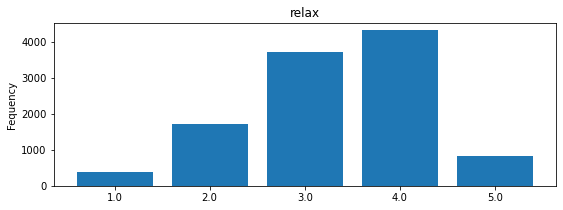

relax: 
 4.0    4315
3.0    3705
2.0    1729
5.0     833
1.0     374
Name: relax, dtype: int64


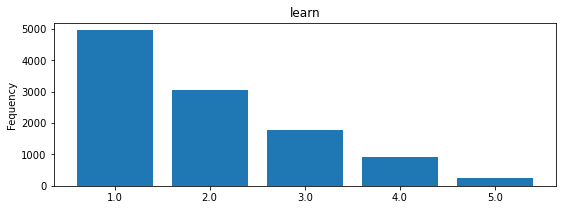

learn: 
 1.0    4943
2.0    3062
3.0    1763
4.0     932
5.0     256
Name: learn, dtype: int64


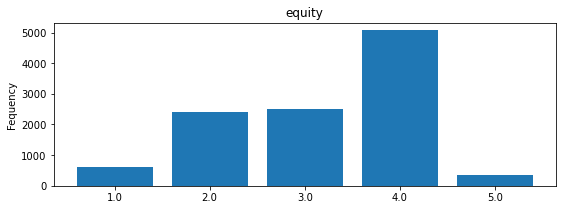

equity: 
 4.0    5067
3.0    2491
2.0    2415
1.0     616
5.0     367
Name: equity, dtype: int64


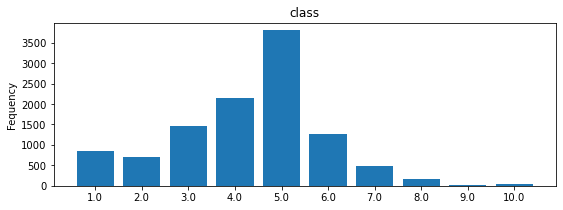

class: 
 5.0     3799
4.0     2148
3.0     1470
6.0     1267
1.0      845
2.0      708
7.0      481
8.0      158
10.0      53
9.0       27
Name: class, dtype: int64


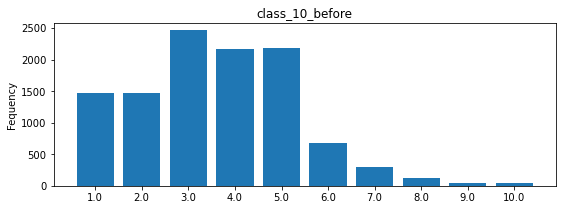

class_10_before: 
 3.0     2460
5.0     2180
4.0     2173
2.0     1477
1.0     1475
6.0      685
7.0      303
8.0      119
10.0      47
9.0       37
Name: class_10_before, dtype: int64


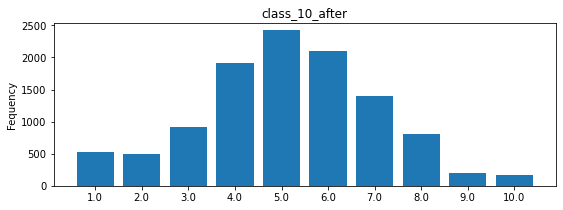

class_10_after: 
 5.0     2420
6.0     2107
4.0     1906
7.0     1399
3.0      923
8.0      800
1.0      533
2.0      499
9.0      202
10.0     167
Name: class_10_after, dtype: int64


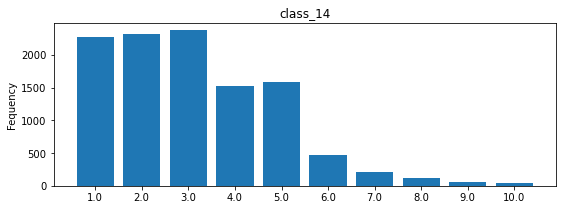

class_14: 
 3.0     2372
2.0     2311
1.0     2279
5.0     1585
4.0     1519
6.0      466
7.0      209
8.0      118
9.0       60
10.0      37
Name: class_14, dtype: int64


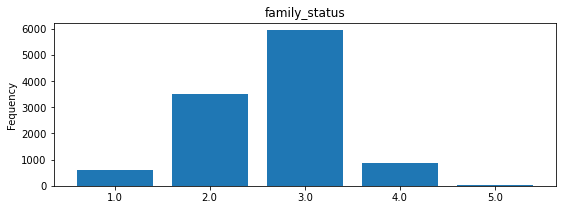

family_status: 
 3.0    5930
2.0    3513
4.0     879
1.0     606
5.0      28
Name: family_status, dtype: int64


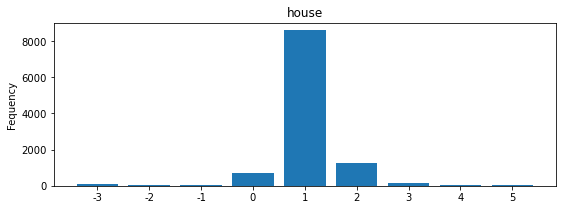

house: 
  1    8584
 2    1245
 0     707
 3     174
-3      87
-1      61
 4      46
 5      29
-2      23
Name: house, dtype: int64


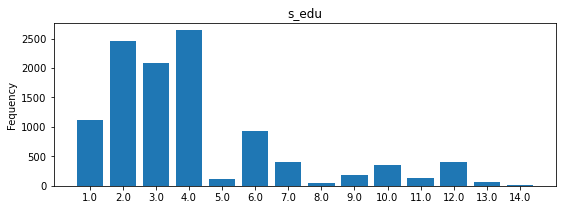

s_edu: 
 4.0     2637
2.0     2464
3.0     2092
1.0     1120
6.0      930
12.0     405
7.0      399
10.0     353
9.0      175
11.0     134
5.0      107
13.0      71
8.0       55
14.0      14
Name: s_edu, dtype: int64


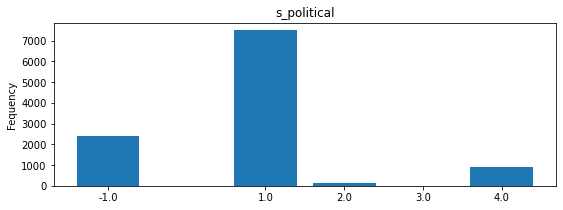

s_political: 
  1.0    7488
-1.0    2387
 4.0     914
 2.0     158
 3.0       9
Name: s_political, dtype: int64


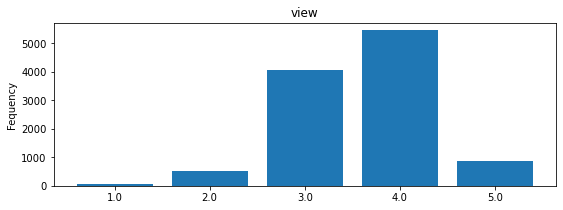

view: 
 4.0    5457
3.0    4063
5.0     855
2.0     528
1.0      53
Name: view, dtype: int64


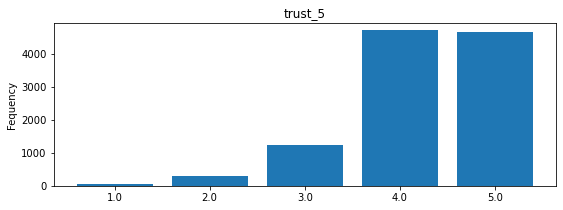

trust_5: 
 4.0    4711
5.0    4662
3.0    1224
2.0     305
1.0      54
Name: trust_5, dtype: int64


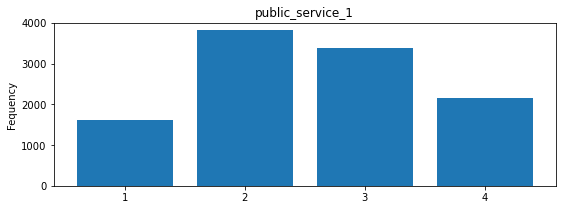

public_service_1: 
 2    3811
3    3370
4    2153
1    1622
Name: public_service_1, dtype: int64


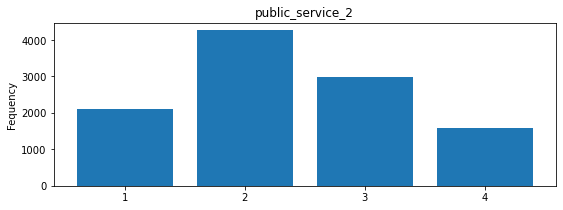

public_service_2: 
 2    4262
3    2985
1    2119
4    1590
Name: public_service_2, dtype: int64


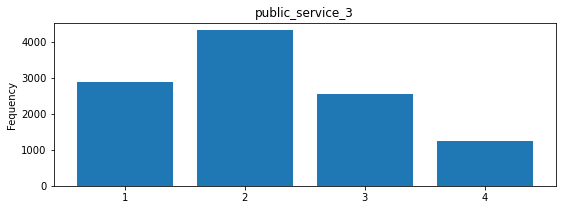

public_service_3: 
 2    4306
1    2881
3    2532
4    1237
Name: public_service_3, dtype: int64


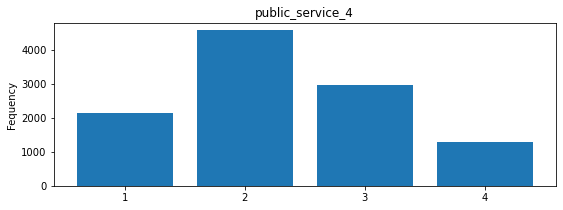

public_service_4: 
 2    4561
3    2966
1    2145
4    1284
Name: public_service_4, dtype: int64


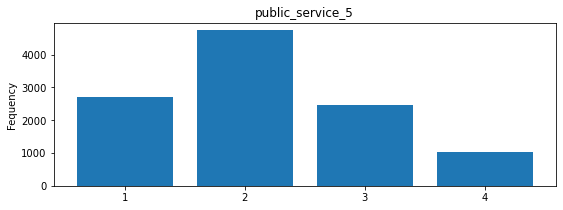

public_service_5: 
 2    4738
1    2720
3    2464
4    1034
Name: public_service_5, dtype: int64


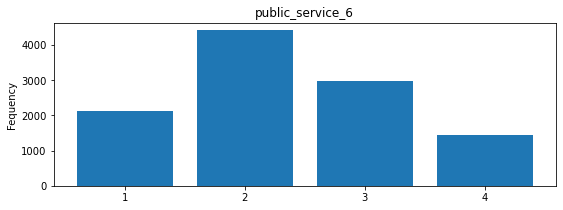

public_service_6: 
 2    4409
3    2973
1    2123
4    1451
Name: public_service_6, dtype: int64


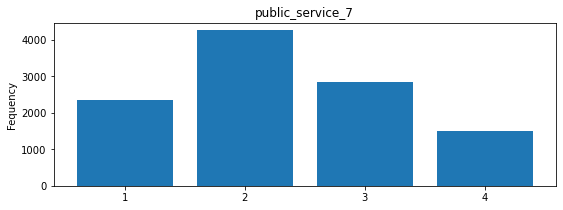

public_service_7: 
 2    4258
3    2841
1    2353
4    1504
Name: public_service_7, dtype: int64


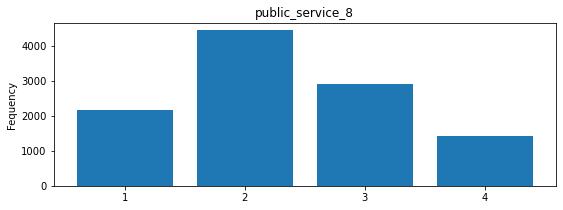

public_service_8: 
 2    4444
3    2899
1    2175
4    1438
Name: public_service_8, dtype: int64


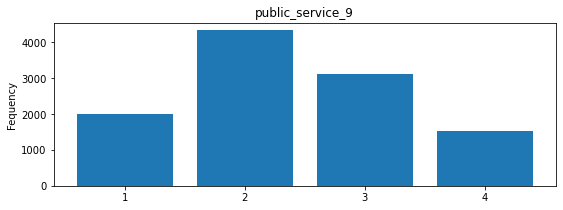

public_service_9: 
 2    4330
3    3104
1    1998
4    1524
Name: public_service_9, dtype: int64


In [26]:
## 查看每个数据的分布状态
def bar_plot(variable):
    '''
        input: variable ex: "sex"
        output: bar plot & value count
    '''
    #get future
    var = data_train_test[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Fequency')
    plt.title(variable)
    plt.show()
    
    print("{}: \n {}".format(variable, varValue))

category = data_train_test.columns.tolist()
for cate in category:
    bar_plot(cate)

In [28]:
## 将train和test的数据分开
data_train = data_train_test[:train_target.shape[0]]
data_test = data_train_test[train_target.shape[0]:]
dis = pd.concat([data_train,train_target],axis = 1)
# 查看数据在happiness上的分布
def data_vs_happiness(cat):
    distribution = dis[[cat,'happiness']].groupby([cat],as_index = False).mean().sort_values(by = 'happiness',ascending = False)
    print('*'*80)
    print(distribution)

category = dis.columns.tolist()
category.remove('happiness') #去掉target
for cate in category:
    data_vs_happiness(cate)

********************************************************************************
     edu  happiness
12  13.0   4.126582
11  12.0   4.058824
1    2.0   4.046154
9   10.0   4.043928
6    7.0   3.965714
8    9.0   3.941176
10  11.0   3.916129
5    6.0   3.907853
3    4.0   3.849382
7    8.0   3.847826
4    5.0   3.806122
2    3.0   3.792432
0    1.0   3.774929
13  14.0   3.666667
********************************************************************************
   income  happiness
4       5   4.400000
5       6   4.333333
3       4   4.139535
2       3   4.035608
1       2   3.934364
0       1   3.794909
********************************************************************************
   health  happiness
4     5.0   4.128009
3     4.0   3.932646
2     3.0   3.781001
1     2.0   3.585739
0     1.0   3.223577
********************************************************************************
   health_problem  happiness
4             5.0   4.036220
3             4.0   3.914247
2             3.

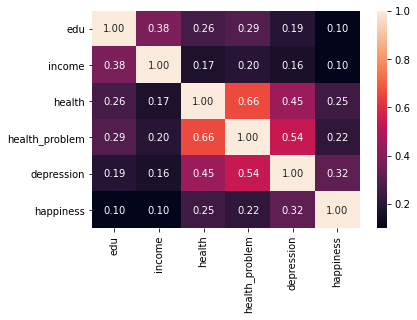

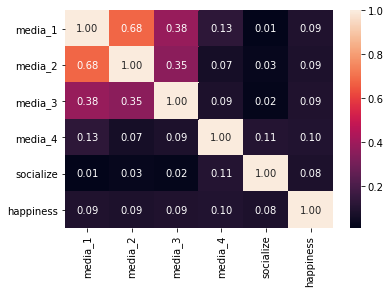

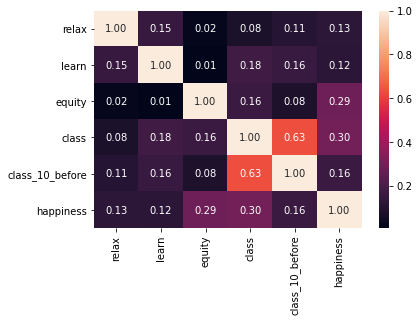

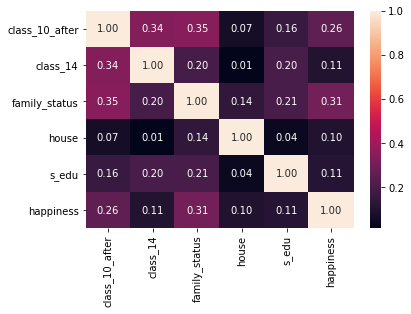

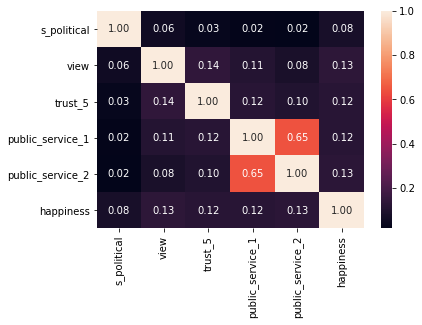

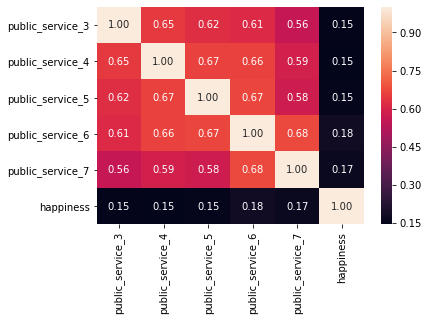

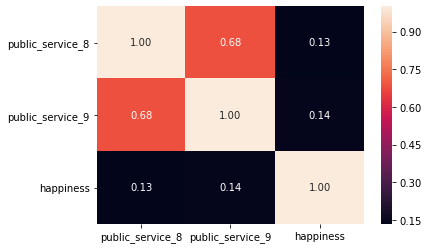

In [29]:
## 用热力图查看相关性
list1 = dis.columns.tolist()
list1.remove('happiness')
step = 5
for i in range(len(list1)//step+1):
    start = step*i
    end = step*(i+1) if len(list1) > step*(i+1) else len(list1)
    sns.heatmap(dis[list1[start:end]+['happiness']].corr(),annot = True, fmt = '0.2f')
    plt.show()

## 算法 

In [30]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
df_y = train_target
df_x = data_train
print(df_y.shape,df_x.shape)

(7988, 1) (7988, 32)


In [32]:
X_train,X_test ,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 6390
X_test 1598
y_train 6390
y_test 1598


### LogisticRegression

In [33]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train=round(logreg.score(X_train,y_train)*100,2)
acc_log_test=round(logreg.score(X_test,y_test)*100,2)
print("Training Accuray:% {}".format(acc_log_train))
print("Testing Accuray:% {}".format(acc_log_test))

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuray:% 60.77
Testing Accuray:% 60.45


In [34]:
random_state=42
classifier=[DecisionTreeClassifier(random_state=random_state),
           SVC(random_state=random_state),
           RandomForestClassifier(random_state=random_state),
           LogisticRegression(random_state=random_state),
           KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
svc_param_grid={"kernel":["rbf"],
               "gamma":[0.001,0.01,0.1,1],
               "C":[1,10,50,100,200,300,1000]}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}
logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors":np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 svc_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

In [35]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.6133020344287949
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  8.9min finished
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6134585289514867
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.1min finished
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.6258215962441315
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   41.7s finished
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

0.6059467918622848
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.9s


0.6045383411580595


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   43.1s finished
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Text(0.5, 1.0, 'Cross Validation Score')

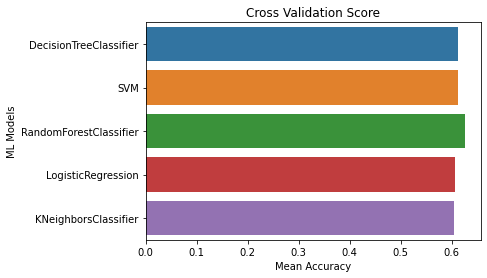

In [36]:
cv_results=pd.DataFrame({"Cross Validation Means":cv_result,"ML Models":["DecisionTreeClassifier","SVM","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"]})
g=sns.barplot("Cross Validation Means","ML Models",data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Score")

# 预测 

In [42]:
# LR
submit['happiness'] = logreg.predict(data_test)
submit.to_csv('./happiness_submit_lr.csv',index=None)

In [43]:
# CV
submit['happiness'] = clf.predict(data_test)
submit.to_csv('./happiness_submit_CV.csv',index=None)